In [16]:
%load_ext autoreload
%autoreload 2

In [17]:
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from torchvision.transforms import ToTensor

print(torch.__version__)
torch.cuda.is_available()

2.8.0+cu126


True

In [18]:
trans = transforms.Compose([
    transforms.RandomCrop([128, 128]),
    transforms.Grayscale(num_output_channels=1),
    transforms.ToTensor()])

In [19]:
training_data = datasets.Imagenette(
    root="data",
    split="train",
    size="160px",
    download=True,
    transform=trans,
)

# Download test data from open datasets.
test_data = datasets.Imagenette(
    root="data",
    split="val",
    size="160px",
    download=True,
    transform=trans,
)

In [20]:
# normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406],
#                                  std=[0.229, 0.224, 0.225])
#
# training_data = datasets.ImageFolder(
#     "data/imagenette2-160/train",
#     transforms.Compose([
#         transforms.Resize(128),
#         transforms.CenterCrop(128),
#         transforms.RandomHorizontalFlip(),
#         transforms.ToTensor(),
#         normalize,
#         transforms.Grayscale(num_output_channels=1),
#     ])
# )
#
# test_data = datasets.ImageFolder(
#     "data/imagenette2-160/val",
#     transforms.Compose([
#         transforms.Resize(128),
#         transforms.CenterCrop(128),
#         transforms.ToTensor(),
#         normalize,
#         transforms.Grayscale(num_output_channels=1),
#     ])
# )

In [21]:
training_data

Dataset Imagenette
    Number of datapoints: 9469
    Root location: data
    StandardTransform
Transform: Compose(
               RandomCrop(size=(128, 128), padding=None)
               Grayscale(num_output_channels=1)
               ToTensor()
           )

In [22]:
training_data.classes

[('tench', 'Tinca tinca'),
 ('English springer', 'English springer spaniel'),
 ('cassette player',),
 ('chain saw', 'chainsaw'),
 ('church', 'church building'),
 ('French horn', 'horn'),
 ('garbage truck', 'dustcart'),
 ('gas pump', 'gasoline pump', 'petrol pump', 'island dispenser'),
 ('golf ball',),
 ('parachute', 'chute')]

In [23]:
first_image, first_label = training_data[10]

In [24]:
first_image.shape, first_label

(torch.Size([1, 128, 128]), 0)

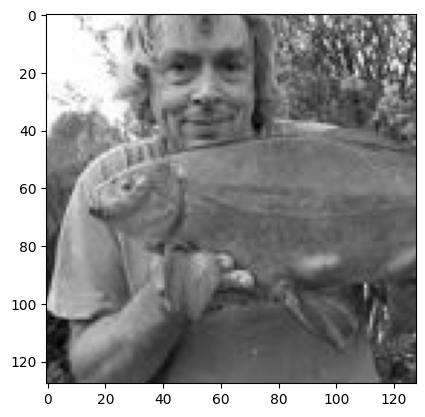

In [25]:
import matplotlib.pyplot as plt
import numpy as np

"""
Deep learning libraries like PyTorch and TensorFlow typically use channels-first format (C, H, W) for image tensors, while matplotlib expects channels-last format (H, W, C). The transpose operation rearranges the dimensions to make the tensor compatible with matplotlib's expectations.
"""

plt.imshow(np.transpose(first_image, (1, 2, 0)), cmap="gray")

In [26]:
# Define model
class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(128*128, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10)
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits



In [27]:
model = NeuralNetwork()
print(model)
# loss_fn = nn.CrossEntropyLoss()
# optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=16384, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)


In [28]:
batch_size = 64

# Create data loaders.
train_dl = DataLoader(training_data, batch_size=batch_size, shuffle=True)
val_dl = DataLoader(test_data, batch_size=batch_size)

In [29]:
for b in train_dl:
    print(b[0].shape, b[1])
    break

torch.Size([64, 1, 128, 128]) tensor([4, 4, 3, 2, 0, 5, 2, 5, 4, 1, 4, 3, 2, 7, 8, 9, 0, 1, 6, 4, 8, 2, 6, 2,
        4, 3, 5, 7, 6, 9, 8, 6, 7, 1, 0, 3, 0, 7, 2, 5, 5, 2, 1, 9, 6, 7, 6, 1,
        1, 6, 6, 0, 5, 0, 2, 6, 9, 1, 3, 7, 4, 1, 1, 7])


In [30]:
from training_utils import train, plot_hist, evaluate

In [ ]:
torch.manual_seed(17)
num_epochs = 10
hist = train(model, num_epochs, train_dl, val_dl)

Debug - Input shape: torch.Size([64, 1, 128, 128])
Debug - Prediction shape: torch.Size([64, 10])
Debug - Target shape: torch.Size([64])
Epoch 1: train_acc: 0.1652 val_acc: 0.1987 train_loss: 2.3248 val_loss: 2.1820
Epoch 2: train_acc: 0.1970 val_acc: 0.1883 train_loss: 2.1830 val_loss: 2.1996
Epoch 3: train_acc: 0.2136 val_acc: 0.2023 train_loss: 2.1580 val_loss: 2.1593
Epoch 4: train_acc: 0.2228 val_acc: 0.2372 train_loss: 2.1356 val_loss: 2.1222
Epoch 5: train_acc: 0.2235 val_acc: 0.2239 train_loss: 2.1326 val_loss: 2.1287
Epoch 6: train_acc: 0.2419 val_acc: 0.2140 train_loss: 2.1083 val_loss: 2.1532
Epoch 7: train_acc: 0.2459 val_acc: 0.2326 train_loss: 2.0996 val_loss: 2.1357
Epoch 8: train_acc: 0.2410 val_acc: 0.2550 train_loss: 2.1003 val_loss: 2.1040


It is challenging to train a model for bigger images with a vanilla neural network.!!!